# This project analyzes the scripts of the famous series `Rick and Morty`. The aim of the project is to provide a sentimental analysis and predict the mood of each character at each sentence / episode

Importing all the needed libraries

In [3]:
# !pip install vaderSentiment

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hamdy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hamdy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
import pandas as pd
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Loading the data

In [7]:
data = pd.read_csv('RickAndMortyScripts.csv')
data.head()

,index,season no.,episode no.,episode name,name,line
0,0,1,1,Pilot,Rick,Morty! You gotta come on. Jus'... you gotta co...
1,1,1,1,Pilot,Morty,"What, Rick? What’s going on?"
2,2,1,1,Pilot,Rick,"I got a surprise for you, Morty."
3,3,1,1,Pilot,Morty,It's the middle of the night. What are you tal...
4,4,1,1,Pilot,Rick,"Come on, I got a surprise for you. Come on, h..."


In [9]:
data = pd.read_csv('RickAndMortyScripts.csv')
data.tail()

,index,season no.,episode no.,episode name,name,line
1900,2483,3,7,Tales From the Citadel,Morty,That was amazing!
1901,2484,3,7,Tales From the Citadel,Rick,Got some of that mermaid puss!
1902,2485,3,7,Tales From the Citadel,Morty,I'm really hoping it wasn't a one-off thing an...
1903,2486,3,7,Tales From the Citadel,Rick,"Pssh! Not at all, Morty. That place will never..."
1904,2487,3,7,Tales From the Citadel,Morty,"Whoo! Yeah! Yeaah! Ohhh, shit!"


In [10]:
data.duplicated().sum()

0

In [11]:
data.isna().sum()

index           0
season no.      0
episode no.     0
episode name    0
name            0
line            0
dtype: int64

In [12]:
data = data.drop(['episode name', 'episode no.', 'season no.', 'index'], axis=1)
data.head()

,name,line
0,Rick,Morty! You gotta come on. Jus'... you gotta co...
1,Morty,"What, Rick? What’s going on?"
2,Rick,"I got a surprise for you, Morty."
3,Morty,It's the middle of the night. What are you tal...
4,Rick,"Come on, I got a surprise for you. Come on, h..."


In [13]:
unique_values = data['name'].value_counts()
print(unique_values)

name
Rick                      420
Morty                     347
Beth                      148
Jerry                     132
Summer                     97
Pickle Rick                77
Supernova                  44
Cop Morty                  34
All Ricks                  32
Mr. Goldenfold             28
President                  27
Cop Rick                   26
Testicle Monster A         26
Principal Vagina           25
Cornvelious Daniel         22
Snuffles                   22
Dr. Wong                   21
Drunk Rick                 21
Agency Director            20
Alan                       19
Candidate Morty            18
Vance                      17
Scary Terry                17
Jessica                    16
All Mortys                 15
Million Ants               15
Riq IV                     13
Ice-T                      13
Morty 2                    13
All Summers                13
Campaign Manager Morty     12
Alien Doctor               12
Lizard Morty               11
Cromu

<Axes: ylabel='name'>

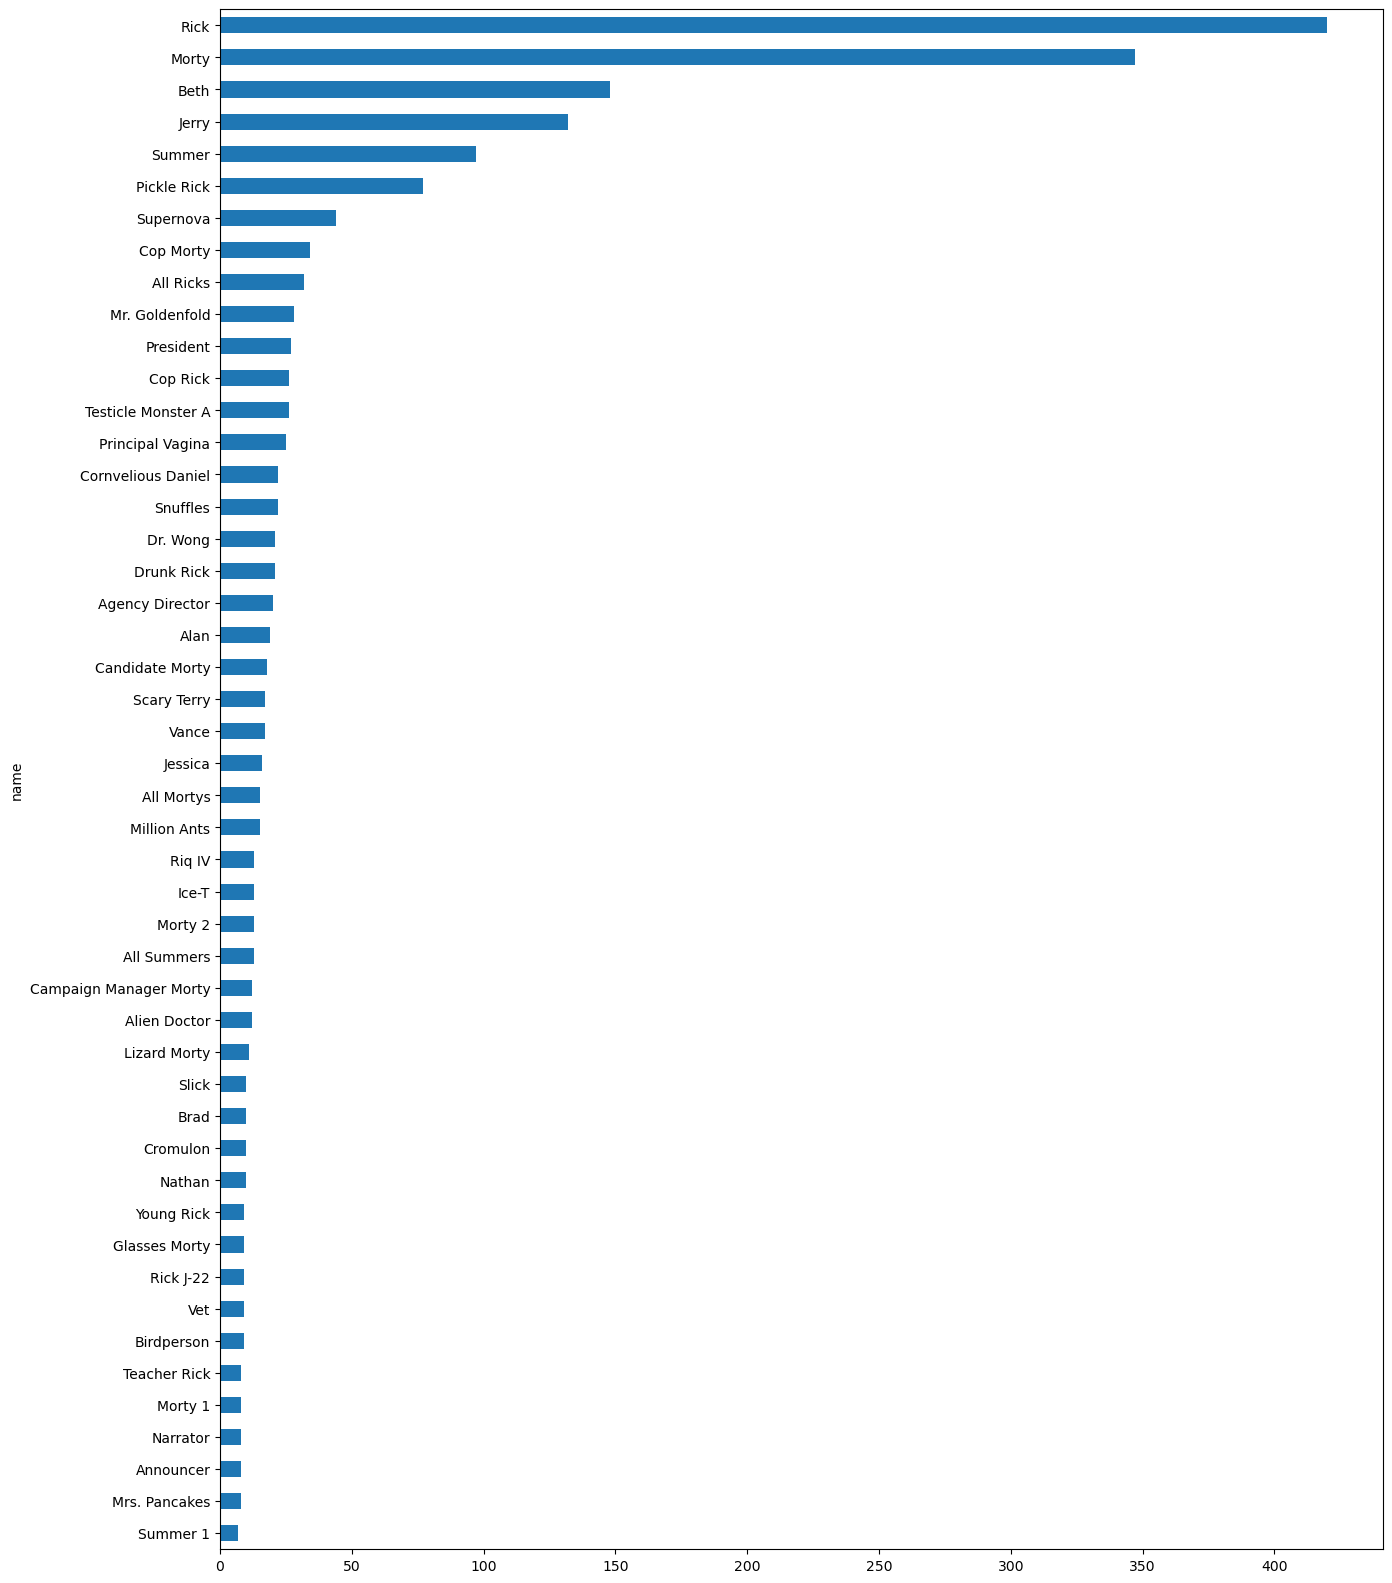

In [14]:
unique_values = unique_values.sort_values(ascending=True)
unique_values.plot(kind='barh', figsize=(15, 20))

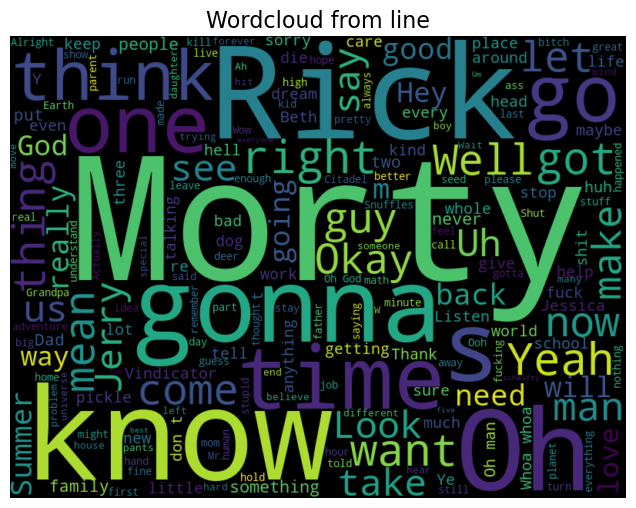

In [15]:
def generate_wordcloud(data, column_name):
  """
  Generates a wordcloud from a DataFrame column.

  Args:
      data: The pandas DataFrame containing the text data.
      column_name: The name of the column containing the text.

  Returns:
      A matplotlib figure object with the wordcloud.
  """

  # Combine all text from the column
  text = " ".join(data[column_name].tolist())

  # Create and generate the wordcloud
  wordcloud = WordCloud(width=800, height=600).generate(text)

  # Create a new figure
  fig, ax = plt.subplots(figsize=(8, 6))

  # Display the wordcloud
  ax.imshow(wordcloud, interpolation='bilinear')
  ax.axis('off')

  # Set title (optional)
  ax.set_title("Wordcloud from " + column_name, fontsize=16)

  return fig

# Example usage (replace 'text_column' with your actual column name)
fig = generate_wordcloud(data.copy(), 'line')
plt.show()

In [16]:
def preprocess(text):
  """
  Preprocesses a movie script text.

  Args:
      text: String containing the movie script text.
  Returns:
      A string containing the preprocessed text.
  """

  # Lowercase all characters
  text = text.lower()

  # Remove stage directions (lines starting with "[" or "]")
  text = re.sub(r"\[.*?\]", "", text)

  # Remove extra spaces and newlines
  text = re.sub(r"\s+", " ", text)

  # Remove punctuation (except for apostrophes)
  text = re.sub(r"[^\w'\s]", "", text)

  # Remove numbers
  text = re.sub(r"\d+", "", text)



  stemmer = PorterStemmer()
  text = " ".join([stemmer.stem(word) for word in text.split()])


  stop_word_list = stopwords.words('english')
  text = " ".join([word for word in text.split() if word not in stop_word_list])

  return text

In [17]:
pre_data = data['line'].apply(preprocess)
pre_data=pd.DataFrame(pre_data)
pre_data.head(10)

,line
0,morti gotta come jus' gotta come
1,rick go
2,got surpris morti
3,it' middl night talk
4,come got surpris come hurri
5,ow ow you'r tug hard
6,gotta go gotta get outta come got surpris morti
7,think thi fli vehicl morti built outta stuff f...
8,yeah rick iit' great thi surpris
9,morti make bomb morti creat bomb


In [18]:
vds=SentimentIntensityAnalyzer()

In [19]:
def sentiment_analysis(text):
    sentiment_scores=vds.polarity_scores(text)

    return sentiment_scores

In [20]:
pre_data["sentiment_scores"]= pre_data['line'].apply(sentiment_analysis)

In [21]:
pre_data['compound_score'] = pre_data['sentiment_scores'].apply(lambda x: x['compound'])

In [22]:
pre_data["sentiment"]=["Positve"  if i > 0.05 else "Negative" if   i  < -0.05 else "Neutral" for i in pre_data["compound_score"]]

In [23]:
pre_data.head()

,line,sentiment_scores,compound_score,sentiment
0,morti gotta come jus' gotta come,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
1,rick go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
2,got surpris morti,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
3,it' middl night talk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
4,come got surpris come hurri,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral


In [24]:
pre_data.tail()

,line,sentiment_scores,compound_score,sentiment
1900,wa amaz,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1901,got mermaid puss,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1902,i'm realli hope oneoff thing see way hey um st...,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.4404,Positve
1903,pssh morti place never ani bear live ever unli...,"{'neg': 0.129, 'neu': 0.791, 'pos': 0.079, 'co...",-0.3400,Negative
1904,whoo yeah yeaah ohhh shit,"{'neg': 0.409, 'neu': 0.341, 'pos': 0.25, 'com...",-0.3400,Negative


In [25]:
pre_data["sentiment"].value_counts()

sentiment
Neutral     885
Positve     610
Negative    410
Name: count, dtype: int64

In [26]:
pre_data['line_num'] = [i for i in range(len(pre_data))]

In [27]:
pre_data.head(10)

,line,sentiment_scores,compound_score,sentiment,line_num
0,morti gotta come jus' gotta come,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,0
1,rick go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,1
2,got surpris morti,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,2
3,it' middl night talk,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,3
4,come got surpris come hurri,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,4
5,ow ow you'r tug hard,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.1027,Negative,5
6,gotta go gotta get outta come got surpris morti,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,6
7,think thi fli vehicl morti built outta stuff f...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,7
8,yeah rick iit' great thi surpris,"{'neg': 0.0, 'neu': 0.388, 'pos': 0.612, 'comp...",0.7430,Positve,8
9,morti make bomb morti creat bomb,"{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'comp...",-0.7506,Negative,9


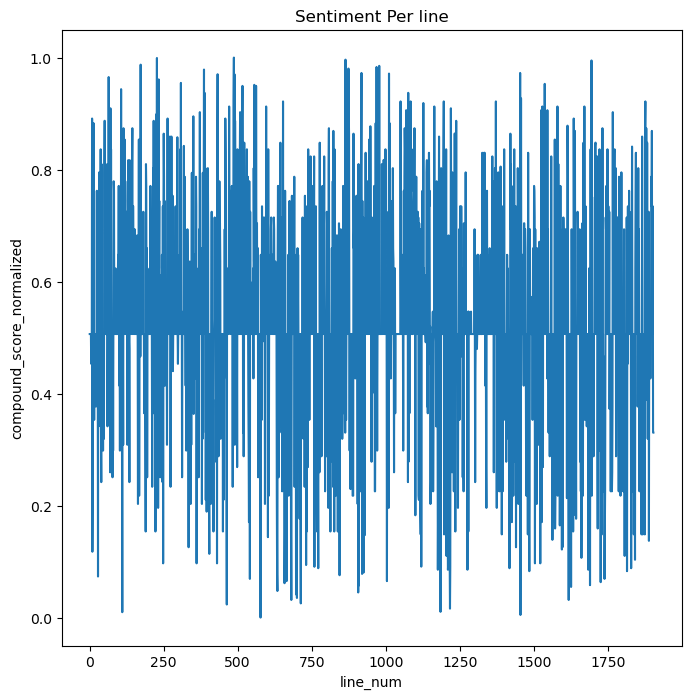

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
pre_data['compound_score_normalized'] = scaler.fit_transform(pre_data[['compound_score']])
plt.figure(figsize=(8, 8))
sns.lineplot(x = 'line_num', y ='compound_score_normalized', data = pre_data)
plt.title('Sentiment Per line')

plt.show()

# **Prediction**



Multinomial Naive Bayes algorithm

 SVM

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pre_data['line'], pre_data['sentiment'], test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Support Vector Machine classifier
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_tfidf, y_train)

# Predictions
y_pred = svm.predict(X_test_tfidf)

# Evaluate the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8031496062992126
              precision    recall  f1-score   support

    Negative       0.87      0.61      0.72        88
     Neutral       0.78      0.94      0.85       168
     Positve       0.80      0.75      0.78       125

    accuracy                           0.80       381
   macro avg       0.82      0.77      0.78       381
weighted avg       0.81      0.80      0.80       381



Random Forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(pre_data['line'], pre_data['sentiment'], test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8136482939632546
              precision    recall  f1-score   support

    Negative       0.90      0.52      0.66        88
     Neutral       0.78      0.99      0.87       168
     Positve       0.83      0.78      0.81       125

    accuracy                           0.81       381
   macro avg       0.84      0.76      0.78       381
weighted avg       0.83      0.81      0.80       381



In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import customtkinter
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from tkinter import filedialog



def predict_mood():
    dialogue = dialogue_entry.get()
    new_dialogue_features = vectorizer.transform([preprocess(dialogue)])
    prediction = rf_classifier.predict(new_dialogue_features)[0]
    mood_label.config(text=f"Predicted Mood: {prediction}")


X = pre_data['line']
y = pre_data['sentiment']

vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_features = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

rf_classifier.fit(X_train, y_train)

# Create the GUI application
root = tk.Tk()
root.title("Morty and Rick Mood Prediction")

# Entry fields for dialogue
dialogue_label = ttk.Label(root, text="Dialogue:")
dialogue_label.pack()
dialogue_entry = ttk.Entry(root)
dialogue_entry.pack()

# Button to trigger prediction
predict_button = ttk.Button(root, text="Predict Mood", command=predict_mood)
predict_button.pack()

# Label to display predicted mood
mood_label = ttk.Label(root, text="Predicted Mood:")
mood_label.pack()

root.mainloop()

analyzing the performance of each approach based on precision, recall, and F1-score for each sentiment class. We'll consider the following factors:

1- Diversity of Models: We want to select approaches that use different algorithms or techniques to ensure diversity.

2- Performance Metrics: We'll prioritize approaches that have high precision, recall, and F1-score for all sentiment classes.

3- Robustness: We'll consider the robustness of each approach, favoring those that perform consistently across different sentiment classes.

4- Computational Resources: We'll consider the computational resources required for each approach.


Based on the considerations mentioned earlier, we can make the following observations:

- SVM and Random Forest classifiers perform consistently well across different sentiment classes with high precision, recall, and F1-score. They also offer diversity in terms of algorithms used.


Therefore, based on the considerations mentioned, the best three approaches would be:

- SVM
- Random Forest